In [11]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from env import host, user, password

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    

def get_telco_data():
    '''
    This function uses the SQL query from below and specifies the database to use
    '''
    # SQL query that pulls the columns from the 'telco_churn' database     
    sql_query = """
                SELECT customer_id, monthly_charges, tenure, total_charges
                FROM customers 
                WHERE contract_type_id = 3;               
                """
    return pd.read_sql(sql_query,get_connection('telco_churn'))

In [10]:
df = get_telco_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
monthly_charges    1695 non-null float64
tenure             1695 non-null int64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.1+ KB


In [16]:
df.

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75
...,...,...,...,...
1690,9964-WBQDJ,24.40,71,1725.4
1691,9972-EWRJS,19.25,67,1372.9
1692,9975-GPKZU,19.75,46,856.5
1693,9993-LHIEB,67.85,67,4627.65


In [18]:
# Inspect values and dtypes

for col in df.columns:
    print(col)
    print(df[col].value_counts(dropna=False))
    print('----------')

customer_id
5485-ITNPC    1
7473-ZBDSN    1
3249-VHRIP    1
3662-FXJFO    1
3865-ZFZIB    1
             ..
2346-CZYIL    1
1621-YNCJH    1
1047-RNXZV    1
6695-FRVEC    1
2266-FUBDZ    1
Name: customer_id, Length: 1695, dtype: int64
----------
monthly_charges
19.70     21
19.85     21
20.05     19
19.55     18
19.75     17
          ..
114.35     1
88.80      1
63.70      1
29.60      1
95.75      1
Name: monthly_charges, Length: 820, dtype: int64
----------
tenure
72    343
71    137
70     88
69     66
68     65
     ... 
3       3
1       2
5       1
2       1
28      1
Name: tenure, Length: 73, dtype: int64
----------
total_charges
NaN        10
1110.05     2
5682.25     2
3533.6      2
5714.2      2
           ..
762.45      1
6562.9      1
1718.2      1
8425.15     1
1638.7      1
Name: total_charges, Length: 1678, dtype: int64
----------


In [19]:

df['total_charges'] = df['total_charges'].replace(r'^\s*$', np.nan, regex=True)

In [20]:
df.total_charges.isnull().sum()

10

In [21]:
df = df.dropna()

In [23]:
# reassign exam3 to integer type
df['total_charges'] = df['total_charges'].astype('float')

In [24]:
df.describe()

,monthly_charges,tenure,total_charges
count,1685.000000,1685.00000,1685.000000
mean,60.872374,57.07181,3728.933947
std,34.712210,17.72913,2571.252806
min,18.400000,1.00000,20.350000
25%,24.050000,48.00000,1278.800000
50%,64.450000,64.00000,3623.950000
75%,90.550000,71.00000,5999.850000
max,118.750000,72.00000,8672.450000


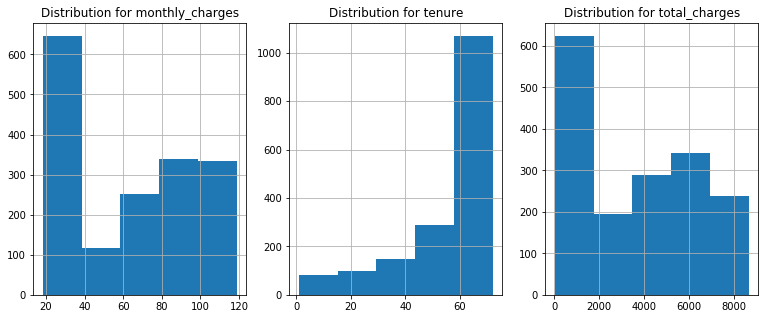

In [25]:
# use subplots to view distribution of all non-id columns
plt.figure(figsize=(13, 5))
for i, col in enumerate(list(df.drop(columns='customer_id').columns)):
    plotnum = i + 1
    plt.subplot(1,3,plotnum)
    plt.title(f'Distribution for {col}')
    df[col].hist(bins=5)

In [26]:
import wrangle

In [27]:
train, validate, test = wrangle.wrangle_telco()

In [28]:
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))